In [1]:
# Import Libraries and Dependencies
from vilib.constrained_optimization.base import co_problem
from vilib.constrained_optimization.generate import*
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
import numpy.linalg as LA
from solvers import *

In [2]:
dimX = 20
dimY = 5
dimU = 0
proj = get_projector("simplex")

q0, p, q, r, A, b = randQCQP(dimX,dimY, proj,False,"uniform", False, dimU)
fx, hx, gradf, gradh, hx_opt = toQCQP(p, q, r)
prob = co_problem(fx, (dimX, dimY), hx_opt, proj, gradf, gradh, True, A, b)

x = np.ones(dimX+dimY+dimU)
F_co, J_co, prox_co = prob.get_parameters(False)

[0.         0.23744276 0.22363833 0.19592661 0.         0.
 0.         0.         0.00754252 0.02062959 0.         0.
 0.         0.         0.24520782 0.         0.06961237 0.
 0.         0.        ]


In [3]:
N = 2000

# starting point
q0 = prox_co(np.ones(dimX + dimY + dimU), 1)

In [4]:
show_out = False
ans0 = adaptive_graal(J_co, F_co, prox_co, q0, N, phi=1.5, output=show_out)[0]

CPU time for aGRAAL: 0.6010131999999999


In [5]:
ans1 = extra_gradient_method(J_co, F_co, prox_co, q0, N, show_out)[0]

CPU time for Extra Gradient: 0.7943128000000002


In [6]:
ans2 = tseng_fbf_linesearch(J_co, F_co, prox_co, q0, 2, N)[0]

CPU time for FBF: 1.3104532


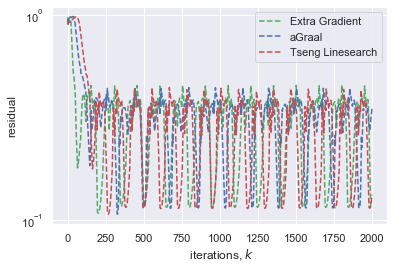

In [8]:
import seaborn as sns
sns.set()
plt.plot(ans1, '--g', label='Extra Gradient')
plt.plot(ans0, '--b', label='aGraal')
plt.plot(ans2, '--r', label='Tseng Linesearch')

plt.legend(loc="upper right")

plt.yscale('log')

plt.xlabel(u' iterations, $k$')
plt.ylabel(u'residual')

plt.savefig('Images/cox20y5z0simplexnonconvex.png', bbox_inches='tight')